In [ ]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

no display found. Using non-interactive Agg backend


In [ ]:
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc,confusion_matrix,matthews_corrcoef
import itertools
import numpy as np

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc,confusion_matrix
import itertools
import numpy as np
import matplotlib.pylab as plt

In [ ]:
data = pd.read_csv('encoded_data.csv')
data.shape
#data.info()

(92359, 55)

In [ ]:
X = data.drop('Score',axis=1)
y = data.Score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# **Neural Nets**

In [10]:
NN = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs',random_state=1)
NN.fit(X_train, y_train.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=5, random_state=1,
              solver='lbfgs')

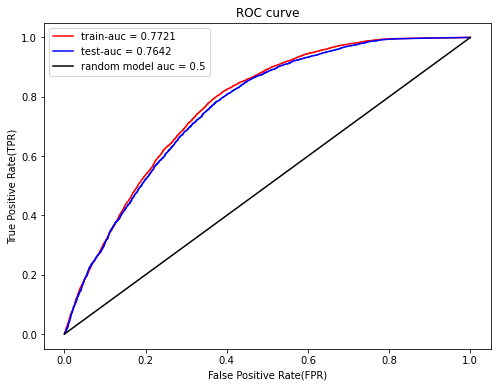

Best AUC for the model is 0.7642 


In [11]:
#predicted value of y probabilities
y_pred_train = NN.predict_proba(X_train)
y_pred_test = NN.predict_proba(X_test)

#predicted values of Y labels
pred_label_train = NN.predict(X_train)
pred_label_test = NN.predict(X_test)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),4)
test_auc = round(auc(fpr_test,tpr_test),4)

%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [12]:
NN_pred = NN.predict(X_test)
NN_proba = NN.predict_proba(X_test)
NN_result = pd.DataFrame({'actual': y_test, 
                             'p(0)': [p[0] for p in NN_proba],
                             'p(1)': [p[1] for p in NN_proba],
                             'predicted': NN_pred })
NN_result.head(10)

,actual,p(0),p(1),predicted
83516,0.0,0.182091,0.817909,1.0
75767,1.0,0.105296,0.894704,1.0
33944,1.0,0.086727,0.913273,1.0
33598,1.0,0.933680,0.066320,0.0
58115,1.0,0.053587,0.946413,1.0
69056,1.0,0.065196,0.934804,1.0
76677,0.0,0.910159,0.089841,0.0
2220,1.0,0.074370,0.925630,1.0
60485,1.0,0.063953,0.936047,1.0
19310,1.0,0.073667,0.926333,1.0


**LiftChart and GainsChart**

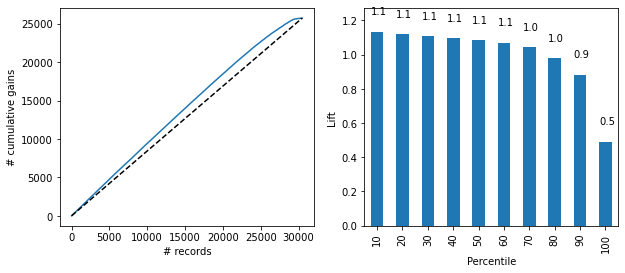

In [13]:
df = NN_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

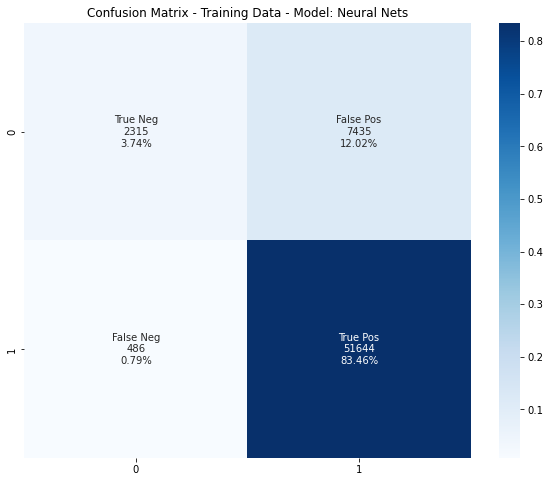

In [14]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_train.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot= labels ,fmt= '', cmap='Blues')
plt.title('Confusion Matrix - Training Data - Model: Neural Nets')
plt.show()

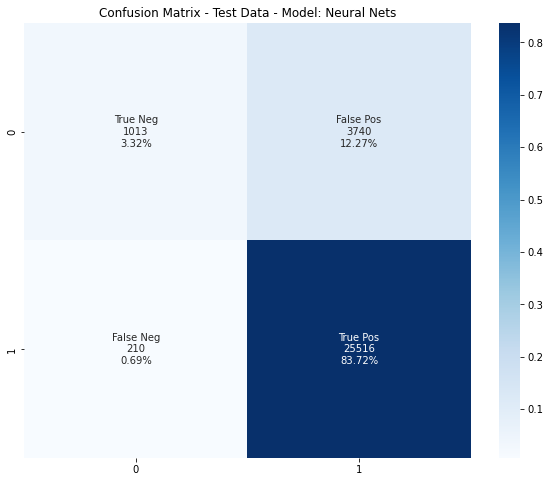

In [12]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot= labels ,fmt= '', cmap='Blues')
plt.title('Confusion Matrix - Test Data - Model: Neural Nets')
plt.show()

In [13]:
regressionSummary(y_train, NN.predict(X_train))


Regression statistics

               Mean Error (ME) : -0.1159
Root Mean Squared Error (RMSE) : 0.3589
     Mean Absolute Error (MAE) : 0.1288


In [14]:
print('F1 Score = ',round(f1_score(y_test, np.round(NN.predict(X_test),0), average='micro'),5))

F1 Score =  0.8704


In [15]:
# training performance (use idxmax to revert the one-hot-encoding)
classificationSummary(y_train, NN.predict(X_train))

Confusion Matrix (Accuracy 0.8712)

       Prediction
Actual     0     1
     0  2179  7571
     1   398 51732


In [16]:
# validation performance
classificationSummary(y_test, NN.predict(X_test))

Confusion Matrix (Accuracy 0.8704)

       Prediction
Actual     0     1
     0  1013  3740
     1   210 25516


In [17]:
print('AIC', AIC_score(y_test, NN.predict(X_test), df = len(X_train.columns) + 1))

AIC 24329.233415760915


In [27]:
matthews_corrcoef(y_test, NN.predict(X_test))

0.37890498663223215